In [176]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score,confusion_matrix
from matplotlib import pyplot as plt

In [177]:
df=pd.read_csv("penguins_train.csv")
df_generate=pd.read_csv("penguins_test.csv")
df

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,38.8,17.2,180.0,3800.0,MALE,9.63954,-25.29856,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,41.1,18.6,189.0,3325.0,MALE,9.32277,-26.09989,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,39.0,17.5,186.0,3550.0,FEMALE,8.57199,-26.07188,Adelie Penguin (Pygoscelis adeliae)
3,Dream,No,39.7,17.9,193.0,4250.0,MALE,9.25769,-25.88798,Adelie Penguin (Pygoscelis adeliae)
4,Biscoe,Yes,47.5,14.2,209.0,4600.0,FEMALE,8.39299,-26.78733,Gentoo penguin (Pygoscelis papua)
...,...,...,...,...,...,...,...,...,...,...
269,Biscoe,Yes,44.4,17.3,219.0,5250.0,MALE,8.13746,-26.79093,Gentoo penguin (Pygoscelis papua)
270,Dream,Yes,36.4,17.0,195.0,3325.0,FEMALE,9.17847,-25.23061,Adelie Penguin (Pygoscelis adeliae)
271,Dream,Yes,42.2,18.5,180.0,3550.0,FEMALE,8.04787,-25.49523,Adelie Penguin (Pygoscelis adeliae)
272,Biscoe,Yes,37.8,18.3,174.0,3400.0,FEMALE,8.73762,-25.09383,Adelie Penguin (Pygoscelis adeliae)


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               274 non-null    object 
 1   Clutch Completion    274 non-null    object 
 2   Culmen Length (mm)   272 non-null    float64
 3   Culmen Depth (mm)    272 non-null    float64
 4   Flipper Length (mm)  272 non-null    float64
 5   Body Mass (g)        272 non-null    float64
 6   Sex                  267 non-null    object 
 7   Delta 15 N (o/oo)    262 non-null    float64
 8   Delta 13 C (o/oo)    263 non-null    float64
 9   Species              274 non-null    object 
dtypes: float64(6), object(4)
memory usage: 21.5+ KB


In [179]:
y=df['Species']
df=df.drop('Species',axis=1)

In [180]:
imputer=SimpleImputer(strategy='mean')
cols= ['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
df[cols]=imputer.fit_transform(df[cols])
df_generate[cols]=imputer.fit_transform(df_generate[cols])

imputer= SimpleImputer(strategy='most_frequent')
cols=['Sex']
df[cols]=imputer.fit_transform(df[cols])
df_generate[cols]=imputer.fit_transform(df_generate[cols])

In [181]:
df=pd.get_dummies(df,drop_first=True)
df_generate=pd.get_dummies(df_generate,drop_first=True)
df.drop(columns=["Sex_FEMALE"],inplace=True,axis=0)

In [182]:
df

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,38.8,17.2,180.0,3800.0,9.63954,-25.29856,False,False,True,True
1,41.1,18.6,189.0,3325.0,9.32277,-26.09989,False,True,True,True
2,39.0,17.5,186.0,3550.0,8.57199,-26.07188,False,False,True,False
3,39.7,17.9,193.0,4250.0,9.25769,-25.88798,True,False,False,True
4,47.5,14.2,209.0,4600.0,8.39299,-26.78733,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
269,44.4,17.3,219.0,5250.0,8.13746,-26.79093,False,False,True,True
270,36.4,17.0,195.0,3325.0,9.17847,-25.23061,True,False,True,False
271,42.2,18.5,180.0,3550.0,8.04787,-25.49523,True,False,True,False
272,37.8,18.3,174.0,3400.0,8.73762,-25.09383,False,False,True,False


In [183]:
scaler=StandardScaler()
columns=df.columns[0:6]
df[columns]=scaler.fit_transform(df[columns])
df_generate[columns]=scaler.fit_transform(df_generate[columns])

print(df.columns,df_generate.columns)

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Island_Dream', 'Island_Torgersen', 'Clutch Completion_Yes',
       'Sex_MALE'],
      dtype='object') Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Island_Dream', 'Island_Torgersen', 'Clutch Completion_Yes',
       'Sex_MALE'],
      dtype='object')


In [184]:
class RandomForestClassifier():
    def __init__(self,n_iter):
        self.n_iter=n_iter
        self.trees=[]
    
    def bootstrap(self,X,y):
        n_samples=X.shape[0]
        idx=np.random.choice(n_samples,n_samples,replace=True)
        return X[idx],y[idx]
        
    def fit(self,X_train,y_train):
        for _ in range(self.n_iter):
            X,y=self.bootstrap(X_train,y_train)
            tree= DecisionTreeClassifier(criterion="entropy",splitter="best",max_features="sqrt",random_state=42)
            tree.fit(X,y)
            self.trees.append(tree)
    
    def predict(self,X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        pred=[]
        for col_idx in range(tree_preds.shape[1]):
            unique_values, counts = np.unique(tree_preds[:,col_idx], return_counts=True)
            mode_index = np.argmax(counts)
            pred.append(unique_values[mode_index])
        return pred

In [185]:
X_train,X_test,y_train,y_test= train_test_split(df,y,test_size=0.2,random_state=42)

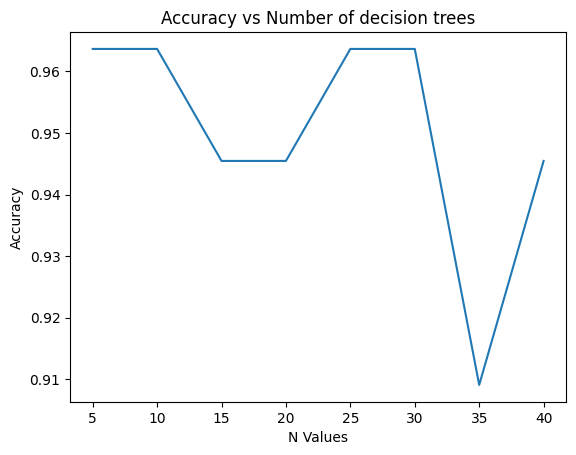

In [186]:
n_values= np.arange(5,41,5)
accuracy=[]
for n in n_values:
    classifier= RandomForestClassifier(10)
    classifier.fit(X_train.values,y_train.values)
    pred=classifier.predict(X_test.values)
    accuracy.append(accuracy_score(y_test,pred))

plt.plot(n_values,accuracy)
plt.xlabel("N Values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of decision trees")
plt.show()

### `Best Number of Decision Trees`

In [187]:
n_max=n_values[np.argmax(accuracy)]
print(n_max)

5


In [188]:
classifier= RandomForestClassifier(n_max)
classifier.fit(X_train.values,y_train.values)
pred=classifier.predict(X_test.values)

In [189]:
pred

['Gentoo penguin (Pygoscelis papua)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Gentoo penguin (Pygoscelis papua)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Chinstrap penguin (Pygoscelis antarctica)',
 'Gentoo penguin (Pygoscelis papua)',
 'Chinstrap penguin (Pygoscelis antarctica)',
 'Gentoo penguin (Pygoscelis papua)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Chinstrap penguin (Pygoscelis antarctica)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Gentoo penguin (Pygoscelis papua)',
 'Chinstrap penguin (Pygoscelis antarctica)',
 'Gentoo penguin (Pygoscelis papua)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Gentoo penguin (Pygoscelis papua)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Gentoo penguin (Pygoscelis papua)',
 'Gentoo penguin (Pygoscelis papua)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Adelie Penguin (Pygoscelis adeli

In [190]:
print("Accuracy : ",accuracy_score(y_test,pred))
print("Macro Precision : ",precision_score(y_test,pred,average="macro"))
print("Micro Precision : ",precision_score(y_test,pred,average="micro"))
print("Macro Recall : ",recall_score(y_test,pred,average="macro"))
print("Micro Recall : ",recall_score(y_test,pred,average="micro"))
print("F1-Score Macro : ",f1_score(y_test,pred,average="macro"))
print("F1-Score Micro : ",f1_score(y_test,pred,average="micro"))

Accuracy :  0.9454545454545454
Macro Precision :  0.9465811965811967
Micro Precision :  0.9454545454545454
Macro Recall :  0.937888198757764
Micro Recall :  0.9454545454545454
F1-Score Macro :  0.9416863672182821
F1-Score Micro :  0.9454545454545454


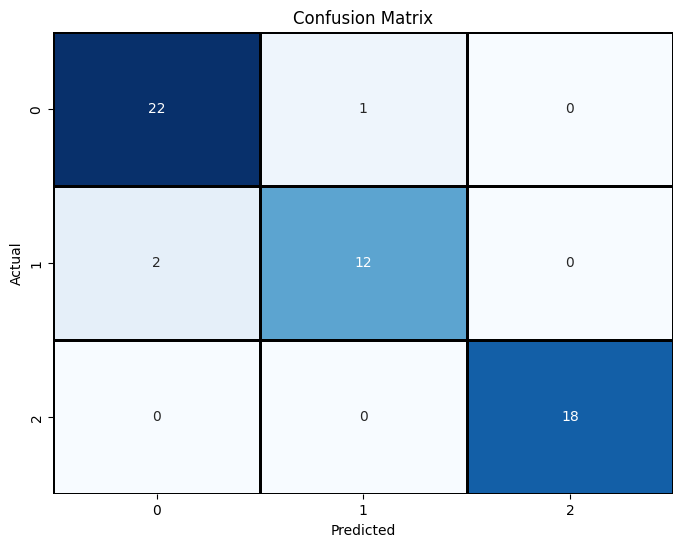

In [191]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="k", cbar=False,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [192]:
pred=classifier.predict(df_generate.values)

In [193]:
with open('random.csv', 'w') as f:
    f.write("predicted\n")
    for item in pred:
        f.write("%s\n" % item)